## Assignment 2

In [1]:
# handle all imports
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from pandas import DataFrame
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import MultiTaskLassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_predict
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import copy

In [2]:
# import data
torques = pd.read_csv('./torques.csv')
prosthesis = pd.read_csv('./Prosthesis_Dataset.csv')
features = pd.read_csv('./features.csv')

#convert to dataframe
torques_df = pd.DataFrame(torques)
prosthesis_df = pd.DataFrame(prosthesis)
features_df = pd.DataFrame(features)


In [3]:
#LINEAR REGRESSION

#define model
regression = LinearRegression()

# define variables
x_emg = features_df
y_torques = torques_df['Torque Y']
x_emg_train, x_emg_test, y_torque_train, y_torque_test = train_test_split(x_emg,y_torques, test_size = 0.2, random_state = 0)

# fit model
regression.fit(x_emg_train, y_torque_train)

# calculate R2
R2_fit = regression.score(x_emg_train, y_torque_train)
R2_pred = regression.score(x_emg_test, y_torque_test)
R2_total = regression.score(x_emg, y_torques)
R2_cross_val = cross_val_score(regression,x_emg, y_torques, cv=5)

# print scores
print('Fit R^2: %.3f' % R2_fit)
print('Prediction R^2: %.3f' % R2_pred)
print('Total R^2: %.3f' % R2_total)
print('\nCROSS VAL R^2 (5 folds):', R2_cross_val)

# The mean score and the standard deviation are given by:
print("%0.2f accuracy with a standard deviation of %0.2f" % (R2_cross_val.mean(), R2_cross_val.std()))

Fit R^2: 1.000
Prediction R^2: 0.898
Total R^2: 0.975

CROSS VAL R^2 (5 folds): [0.28241306 0.35347368 0.91538996 0.96976037 0.97108181]
0.70 accuracy with a standard deviation of 0.31


In [4]:
# RIDGE REGRESSION

# define model
alphas = np.logspace(-3,3,1000)
ridge = RidgeCV(alphas = alphas, cv = 5)
scaler = StandardScaler()

# scale variables
scaler.fit(x_emg_train)
x_emg_train_scaled = scaler.transform(x_emg_train)
x_emg_test_scaled = scaler.transform(x_emg_test)

# fit and score
ridge.fit(x_emg_train,y_torque_train)
R2ridge_fit_old = ridge.score(x_emg_train,y_torque_train)
R2ridge_pred_old = ridge.score(x_emg_test,y_torque_test)
old_alpha = ridge.alpha_

# fit and score with scaled data
ridge.fit(x_emg_train_scaled, y_torque_train)
R2ridge_fit_new = ridge.score(x_emg_train_scaled,y_torque_train)
R2ridge_pred_new = ridge.score(x_emg_test_scaled,y_torque_test)
new_scaled_alpha = ridge.alpha_

# print scores
print('Fit original R^2: %.3f' % R2ridge_fit_old)
print('Fit new scaled R^2: %.3f' % R2ridge_fit_new)

print('Pred original R^2: %.3f' % R2ridge_pred_old)
print('Pred new scaled R^2: %.3f' % R2ridge_pred_new)

print('Best alpha: %3f' % old_alpha)
print('Best alpha (scaled): %3f' % new_scaled_alpha)

Fit original R^2: 0.992
Fit new scaled R^2: 0.992
Pred original R^2: 0.990
Pred new scaled R^2: 0.988
Best alpha: 5.672229
Best alpha (scaled): 5.148867


/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


In [5]:
# LASSO MODEL

#define model
lasso = LassoCV(n_alphas = 1000)

# scale variables
scaler.fit(x_emg_train)
x_emg_train_scaled = scaler.transform(x_emg_train)
x_emg_test_scaled = scaler.transform(x_emg_test)

# fit model
lasso.fit(x_emg_train_scaled,y_torque_train)

# get the R2 for both the train and test data
R2lassoCV_fit = lasso.score(x_emg_train_scaled,y_torque_train)
R2lassoCV_predict = lasso.score(x_emg_test_scaled,y_torque_test)

# print results
print('Fit R^2: %.3f' % R2lassoCV_fit)
print('Prediction R^2: %.3f' % R2lassoCV_predict)
print('Best alpha: %3f' % lasso.alpha_)


Fit R^2: 0.994
Prediction R^2: 0.993
Best alpha: 0.046267


In [6]:
# ELASTIC NET

# define model
alpha = 0.1
l1_ratio = 0.5 # 0 for ridge, 1 for lasso
elastic_net = ElasticNet(alpha = alpha, l1_ratio = l1_ratio, random_state = 42)

# fit and predict
elastic_net.fit(x_emg_train_scaled,y_torque_train)
y_torque_pred = elastic_net.predict(x_emg_test_scaled)

# evaluate mse
mse = mean_squared_error(y_torque_test, y_torque_pred)
print("Mean Squared Error:", mse)

# Calculate R2 score
r2_enet = r2_score(y_torque_test, y_torque_pred)
print("R2 Score:", r2_enet)

# Perform cross-validation to get predicted values
y_cv_pred = cross_val_predict(elastic_net, x_emg_test_scaled, y_torque_test, cv=5)

# Calculate predicted R2 score
predicted_r2 = r2_score(y_torque_test, y_cv_pred)
print("Predicted R2 Score:", predicted_r2)


Mean Squared Error: 0.8781068477352285
R2 Score: 0.9876355456675755
Predicted R2 Score: 0.9529548270713429


In [7]:
# define data variables
x_emg_var = x_emg[['Tibialis Anterior Var','Lateral Gastrocnemius Var','Medial Gastrocnemius Var','Soleus Var', 'Peroneus Longus Var','Peroneus Brevis Var']] 
x_var_train, x_var_test, y_var_train, y_var_test = train_test_split(x_emg_var,y_torques, test_size = 0.2, random_state = 0)

# scale variables
scaler.fit(x_var_train)
x_var_train_scaled = scaler.transform(x_var_train)
x_var_test_scaled = scaler.transform(x_var_test)


# fit model
lasso.fit(x_var_train_scaled,y_var_train)

#get the R2 for both the train and test data
var_lasso_fit = lasso.score(x_var_train_scaled,y_var_train)
var_lasso_pred = lasso.score(x_var_test_scaled,y_var_test)

# print results
print('Fit R^2: %.3f' % var_lasso_fit)
print('Prediction R^2: %.3f' % var_lasso_pred)
print('Best alpha: %3f' % lasso.alpha_)
print(lasso.coef_)

Fit R^2: 0.913
Prediction R^2: 0.905
Best alpha: 0.246929
[ 5.81361578  0.21448824 -0.         -2.47425296 -3.9168937  -2.14310562]


2a:
How much better/worse at predicting the Y torque during general usage of this wearable device
when considering all 60 features instead of just variances. Use the algorithm that you decide is
best. 
- When including all 60 features, the prediction R2 was 0.993, but with just the variances the prediction R2 is only 0.905. The fit of the model (0.913) is also less than that when all 60 features were included (0.994). The difference isn't drastic, but the model doesn't seem as accurate without just the variances.

2b:
If someone was only interested in using the EMG variances to predict Y torque, should they
include all 6 muscles in their model? If no, then which muscles should be included in the model
(and hence EMG from which are required to be measured and recorded).
- No, they should not include all 6 muscles. If we look at the coefficients, it seems like Medial Gastrocnemius Var doesn't contribute to the model (coefficient is 0). Thus, the muscles that should be included are Tibialis Anterior, lateral Gastrocnemius, Soleus, Peroneus Longus, and Peroneus Brevis. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


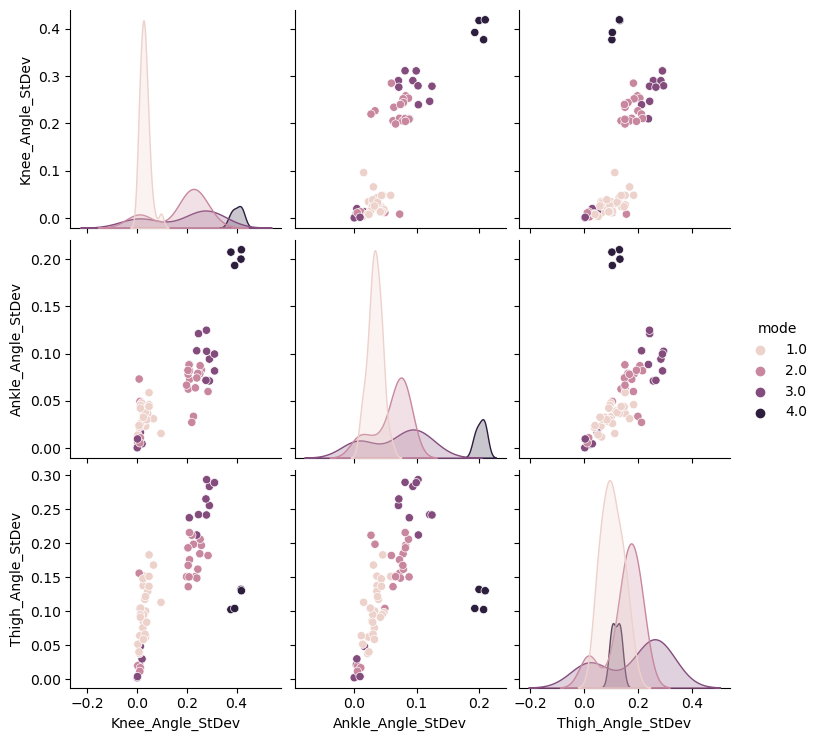

Classification Report:
              precision    recall  f1-score   support

         1.0       0.75      1.00      0.86         9
         2.0       1.00      0.40      0.57         5

    accuracy                           0.79        14
   macro avg       0.88      0.70      0.71        14
weighted avg       0.84      0.79      0.76        14

Confusion Matrix:
[[9 0]
 [3 2]]


In [8]:
# plot std combinations
sns.pairplot(prosthesis_df, hue='mode', vars=['Knee_Angle_StDev', 'Ankle_Angle_StDev', 'Thigh_Angle_StDev'])
plt.show()

# define data variables
pro_std = prosthesis_df[['Knee_Angle_StDev','Ankle_Angle_StDev','Thigh_Angle_StDev']]
G = prosthesis_df['mode']
pro_train,pro_test, g_train, g_test = train_test_split(pro_std,G, test_size=0.2, random_state = 312)

# run multi class regression
clfmc = LogisticRegression(multi_class= 'ovr')
clfmc.fit(pro_train,g_train)

# predict
probmc = clfmc.predict_proba(pro_test)
classmc = clfmc.predict(pro_test)

# evaluate model
print("Classification Report:")
print(classification_report(g_test, classmc))
print("Confusion Matrix:")
print(confusion_matrix(g_test, classmc))

In [9]:
# scale data
pro_std_scaled = scaler.fit_transform(pro_std)
pro_train_scaled,pro_test_scaled, g_train, g_test = train_test_split(pro_std_scaled,G, test_size=0.2, random_state = 9)

# logistic regression
logreg = LogisticRegression(multi_class = 'ovr')
logreg.fit(pro_train_scaled,g_train)

# predict
log_probmc = logreg.predict_proba(pro_test_scaled)
log_classmc = logreg.predict(pro_test_scaled)

# print results
print("probability of being in each class", log_probmc)
print("the class of each datapoint", log_classmc)

probability of being in each class [[0.66903153 0.27191068 0.0569486  0.00210919]
 [0.08168196 0.42353158 0.46349856 0.0312879 ]
 [0.1007239  0.35846416 0.49310526 0.04770668]
 [0.61454424 0.16065808 0.22245739 0.0023403 ]
 [0.08261042 0.52968366 0.35137604 0.03632988]
 [0.63119423 0.22238765 0.14351934 0.00289877]
 [0.07346472 0.45867474 0.43783958 0.03002096]
 [0.04647752 0.55280732 0.38316579 0.01754936]
 [0.70361722 0.19527655 0.09623876 0.00486747]
 [0.60316711 0.34644208 0.04828352 0.00210729]
 [0.00092891 0.24163161 0.12780765 0.62963184]
 [0.15014378 0.45270095 0.37549455 0.02166072]
 [0.63667992 0.32737282 0.03315655 0.00279071]
 [0.56239947 0.22346575 0.21225756 0.00187723]]
the class of each datapoint [1. 3. 3. 1. 2. 1. 2. 2. 1. 1. 4. 2. 1. 1.]


(-1.4710189844378758, 3.4210132812290253)

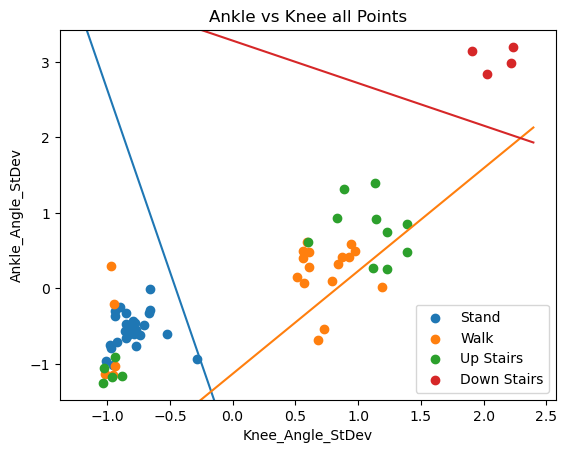

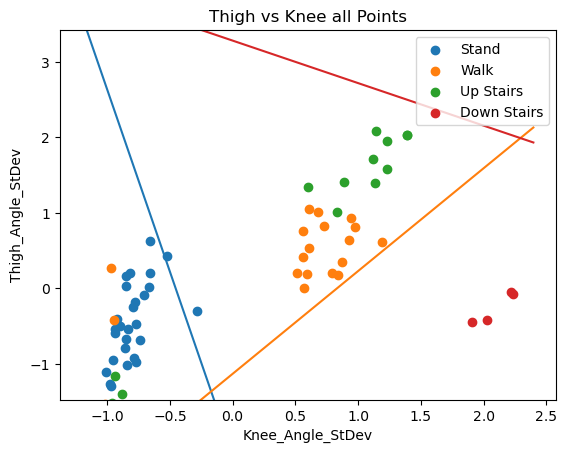

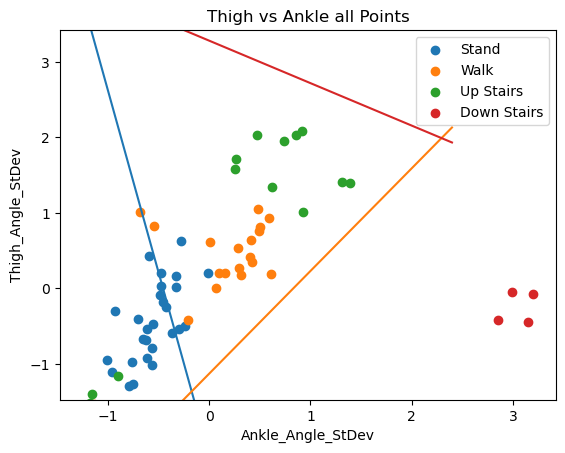

In [10]:
# B & B0 variables
Bmc = logreg.coef_
B0mc = logreg.intercept_

# ankle vs knee scatter plot
plt.figure()
plt.scatter(pro_std_scaled[G==1][:,0],pro_std_scaled[G==1][:,1])
plt.scatter(pro_std_scaled[G==2][:,0],pro_std_scaled[G==2][:,1])
plt.scatter(pro_std_scaled[G==3][:,0],pro_std_scaled[G==3][:,1])
plt.scatter(pro_std_scaled[G==4][:,0],pro_std_scaled[G==4][:,1])

# label plot
plt.xlabel('Knee_Angle_StDev')
plt.ylabel('Ankle_Angle_StDev')
plt.legend(('Stand','Walk','Up Stairs', 'Down Stairs'))
plt.title('Ankle vs Knee all Points')

# Boundaries of plots
xll , xul = plt.xlim()
yll , yul = plt.ylim()

# plot decision boundaries
for i in range(Bmc.shape[0]):
    plt.plot([xll, xul],[(-B0mc[i]-Bmc[i,0]*xll)/Bmc[i,1],(-B0mc[i]-Bmc[i,0]*xul)/Bmc[i,1]])
plt.ylim([yll,yul])

# thigh vs knee scatter plot
plt.figure()
plt.scatter(pro_std_scaled[G==1][:,0],pro_std_scaled[G==1][:,2])
plt.scatter(pro_std_scaled[G==2][:,0],pro_std_scaled[G==2][:,2])
plt.scatter(pro_std_scaled[G==3][:,0],pro_std_scaled[G==3][:,2])
plt.scatter(pro_std_scaled[G==4][:,0],pro_std_scaled[G==4][:,2])

# label plot
plt.xlabel('Knee_Angle_StDev')
plt.ylabel('Thigh_Angle_StDev')
plt.legend(('Stand','Walk','Up Stairs', 'Down Stairs'))
plt.title('Thigh vs Knee all Points')

# plot decision boundaries
for i in range(Bmc.shape[0]):
    plt.plot([xll, xul],[(-B0mc[i]-Bmc[i,0]*xll)/Bmc[i,1],(-B0mc[i]-Bmc[i,0]*xul)/Bmc[i,1]])
plt.ylim([yll,yul])

# thigh vs ankle
plt.figure()
plt.scatter(pro_std_scaled[G==1][:,1],pro_std_scaled[G==1][:,2])
plt.scatter(pro_std_scaled[G==2][:,1],pro_std_scaled[G==2][:,2])
plt.scatter(pro_std_scaled[G==3][:,1],pro_std_scaled[G==3][:,2])
plt.scatter(pro_std_scaled[G==4][:,1],pro_std_scaled[G==4][:,2])

# label plot
plt.xlabel('Ankle_Angle_StDev')
plt.ylabel('Thigh_Angle_StDev')
plt.legend(('Stand','Walk','Up Stairs', 'Down Stairs'))
plt.title('Thigh vs Ankle all Points')

# plot decision boundaries
for i in range(Bmc.shape[0]):
    plt.plot([xll, xul],[(-B0mc[i]-Bmc[i,0]*xll)/Bmc[i,1],(-B0mc[i]-Bmc[i,0]*xul)/Bmc[i,1]])
plt.ylim([yll,yul])

In [11]:
# Calculate Fit Score
clfmc_fit = logreg.score(pro_train_scaled,g_train)
print('Fit: ', clfmc_fit)
# Calculate Prediction Score
clfmc_pred = logreg.score(pro_test_scaled,g_test)
print('Pred: ', clfmc_pred)

Fit:  0.8113207547169812
Pred:  0.7857142857142857


In [12]:
# create variables for actual output vs predicted output
g_actual = (prosthesis_df['mode']).to_numpy()
g_actual = g_actual.astype(int)
g_pred = logreg.predict(pro_std_scaled).astype(int)

# conditions for true positive, true negatives, false negatives, and false positives
tp1 = (g_actual==1) & (g_pred ==1)
tp2 = (g_actual==2) & (g_pred ==2)
tp3 = (g_actual==3) & (g_pred ==3)
tp4 = (g_actual==4) & (g_pred ==4)

tn1 = (g_actual!=1) & (g_pred !=1)
tn2 = (g_actual!=2) & (g_pred !=2)
tn3 = (g_actual!=3) & (g_pred !=3)
tn4 = (g_actual!=4) & (g_pred !=4)

fn1 = (g_actual==1) & (g_pred !=1)
fn2 = (g_actual==2) & (g_pred !=2)
fn3 = (g_actual==3) & (g_pred !=3)
fn4 = (g_actual==4) & (g_pred !=4)

fp1 = (g_actual!=1) & (g_pred ==1)
fp2 = (g_actual!=2) & (g_pred ==2)
fp3 = (g_actual!=3) & (g_pred ==3)
fp4 = (g_actual!=4) & (g_pred ==4)

# calculate tp, fn, fp, tn
tp = tp1.sum()+tp2.sum()+tp3.sum()+tp4.sum()
fn = fn1.sum()+fn2.sum()+fn3.sum()+fn4.sum()
fp = fp1.sum() + fp2.sum() + fp3.sum() +fp4.sum()
tn = tn1.sum() + tn2.sum() + tn3.sum() + tn4.sum()

# confusion matrix of results
cm = np.array([[tp, fn],[fp, tn]])
print(cm)



[[ 54  13]
 [ 13 188]]


In [13]:
# calculate sensitivity and specificity
sensitivity = tp/(tp+fn)
specificity = tn/(tn+fp)

# print results
print('Sensitivity: %.3f' % sensitivity)
print('Specificity: %.3f' % specificity)

Sensitivity: 0.806
Specificity: 0.935


In [14]:
# initialize counter 
false_count = 0

# conditions for stand or walk mode when going up or down the stairs. increase count when conditions met
for num in range(0, len(g_actual)):
  if g_actual[num] == 3:
    if g_pred[num] == 1:
      false_count+=1
    if g_pred[num] == 2:
      false_count+=1
  if g_actual[num] == 4:
    if g_pred[num] == 1:
      false_count+=1
    if g_pred[num] == 2:
      false_count+=1

# calculate percentage
percent = round(false_count/len(g_actual)*100,2)

# print results
print("percentage putting prosthesis in stand or walk mode when going up or down the stairs: ", percent, "%")



percentage putting prosthesis in stand or walk mode when going up or down the stairs:  7.46 %


In [15]:
# initialize lists that track true predictions for group 3 and 4
g_train_np = g_train.to_numpy()
g_true3 = copy.copy(g_train.to_numpy())
g_true4 = copy.copy(g_train.to_numpy())

# define lists based on conditions
for num in range(0, len(g_train_np)):
  if g_train_np[num] == 1:
    g_true3[num] = 0
    g_true4[num] = 0

  if g_train_np[num] == 2:
    g_true3[num] = 0
    g_true4[num] = 0

  if g_train_np[num] == 3:
    g_true3[num] = 1
    g_true4[num] = 0

  if g_train_np[num] == 4:
    g_true3[num] = 0
    g_true4[num] = 1


In [16]:
# initialize threshold list and auc variable
thresh_list = np.linspace(0,1,101)
best_auc = 0

# determine optimal threshold mode 3
for num in thresh_list:
  g_pred_thresh = (logreg.predict_proba(pro_train_scaled) >= num).astype(int)
  current_auc = metrics.roc_auc_score(g_true3, g_pred_thresh[:,2])
  if current_auc >= best_auc:
    best_auc = current_auc
    best_thresh = num
      
# print results
print("best threshold for mode 3:", best_thresh)
print("best auc for mode 3:", best_auc)


# determine optimal threshold mode 4
for num in thresh_list:
  g_pred_thresh = (logreg.predict_proba(pro_train_scaled) >= num).astype(int)
  current_auc = metrics.roc_auc_score(g_true4, g_pred_thresh[:,3])
  if current_auc >= best_auc:
    best_auc = current_auc
    best_thresh = num

# print results
print("best threshold for mode 4:", best_thresh)
print("best auc for mode 4:", best_auc)

best threshold for mode 3: 0.51
best auc for mode 3: 0.875
best threshold for mode 4: 0.64
best auc for mode 4: 1.0


auc for mode 3: 0.875
auc for mode 4: 1.0


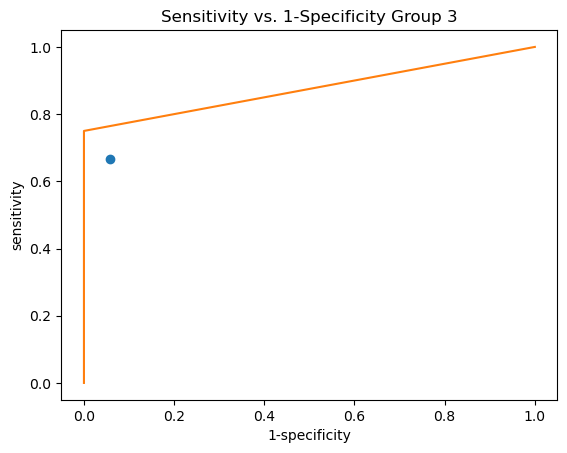

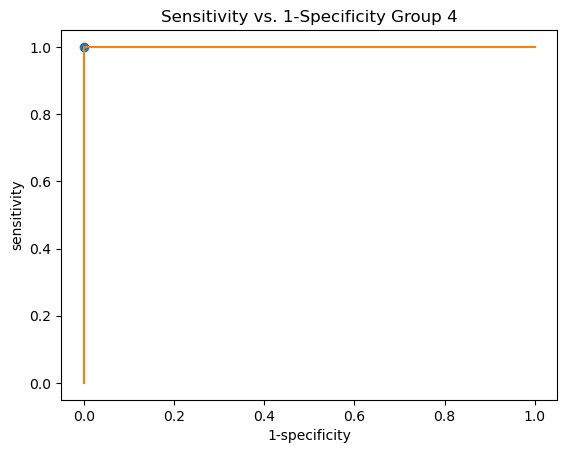

In [17]:
# Plot ROC Curve


# define sensitivity and specificity for groups 3 and 4
sensitivity3 = tp3.sum()/(tp3.sum()+fn3.sum())
specificity3 = tn3.sum()/(tn3.sum()+fp3.sum())

sensitivity4 = tp4.sum()/(tp4.sum()+fn4.sum())
specificity4 = tn4.sum()/(tn4.sum()+fp4.sum())

# run probability predictions
train_proba= logreg.predict_proba(pro_train_scaled)
test_proba = logreg.predict_proba(pro_test_scaled)

# filter predictions based on thresholds
g_pred_best_thresh3 = (logreg.predict_proba(pro_train_scaled) >= 0.51).astype(int)
g_pred_best_thresh4 = (logreg.predict_proba(pro_train_scaled) >= 0.64).astype(int)

# plot ROC curve mode 3
plt.figure()
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.title('Sensitivity vs. 1-Specificity Group 3')
plt.plot(1 - specificity3, sensitivity3,'o')
fpr3, tpr3, thresholds3e = metrics.roc_curve(g_train, g_pred_best_thresh3[:,2], pos_label = 3)
plt.plot(fpr3,tpr3)

# plot ROC curve mode 4
plt.figure()
plt.xlabel('1-specificity')
plt.ylabel('sensitivity')
plt.title('Sensitivity vs. 1-Specificity Group 4')
plt.plot(1 - specificity4, sensitivity4,'o')
fpr4, tpr4, thresholds4 = metrics.roc_curve(g_train, g_pred_best_thresh4[:,3], pos_label = 4)
plt.plot(fpr4,tpr4)

# compute auc
auc3 = metrics.roc_auc_score(g_true3, g_pred_best_thresh3[:,2])
auc4 = metrics.roc_auc_score(g_true4, g_pred_best_thresh4[:,3])

# print results
print('auc for mode 3:', auc3)
print('auc for mode 4:', auc4)

In [18]:
# find threshold for walking up stairs trials all classified as walking up
m3p = train_proba[:,2]
threshold_min = round(m3p.min(), 3)

# print results
print('threshold to ensure all walking up trials are classified:', threshold_min)

threshold to ensure all walking up trials are classified: 0.033


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


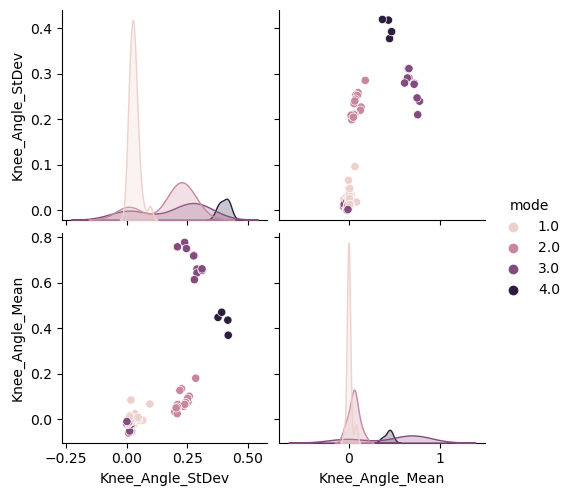

probability of being in each class [[0.16831735 0.68614503 0.05543555 0.09010207]
 [0.11939068 0.68273103 0.06812903 0.12974926]
 [0.71264944 0.18467794 0.09962224 0.00305038]
 [0.22887061 0.63248994 0.07189051 0.06674894]
 [0.75201451 0.14278716 0.10346441 0.00173392]
 [0.74159117 0.15692713 0.09944057 0.00204114]
 [0.75261507 0.14877601 0.09691202 0.0016969 ]
 [0.13137472 0.68369562 0.0661825  0.11874717]
 [0.71101679 0.20315566 0.08294129 0.00288626]
 [0.19048936 0.59381324 0.12234219 0.09335521]
 [0.15565076 0.68892655 0.05712193 0.09830076]
 [0.24575561 0.63001695 0.06500357 0.05922387]
 [0.73997804 0.14896436 0.1089352  0.0021224 ]
 [0.73221573 0.19875016 0.06712122 0.00191288]]
the class of each datapoint [2. 2. 1. 2. 1. 1. 1. 2. 1. 2. 2. 2. 1. 1.]


In [19]:
# visualize relationship between angles of each mode
sns.pairplot(prosthesis_df, hue='mode', vars=['Knee_Angle_StDev', 'Knee_Angle_Mean'])
plt.show()

# set variables
knee = prosthesis_df[['Knee_Angle_Mean','Knee_Angle_StDev']]
G = prosthesis_df['mode']

# scale
knee_scaled = scaler.fit_transform(knee)

# set up training and testing data
knee_train, knee_test, G_train, G_test = train_test_split(knee_scaled, G, test_size=0.2, random_state=7)

# multi class regression
logreg.fit(knee_train,G_train)

# prediction
probmc = logreg.predict_proba(knee_test)
classmc = logreg.predict(knee_test)

# print results
print("probability of being in each class", probmc)
print("the class of each datapoint", classmc)


(-1.1968610081527031, 2.395887283683421)

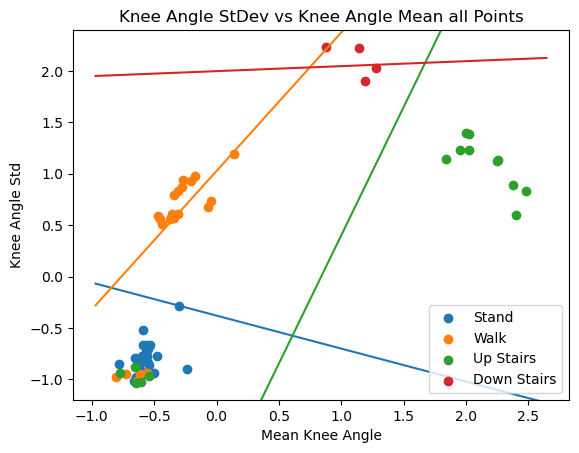

In [20]:
# determine B and B0
Bmc = logreg.coef_
B0mc = logreg.intercept_

# scatter plot of mean vs std for all points (not within range)
plt.scatter(knee_scaled[G==1][:,0],knee_scaled[G==1][:,1])
plt.scatter(knee_scaled[G==2][:,0],knee_scaled[G==2][:,1])
plt.scatter(knee_scaled[G==3][:,0],knee_scaled[G==3][:,1])
plt.scatter(knee_scaled[G==4][:,0],knee_scaled[G==4][:,1])

# label plot
plt.xlabel("Mean Knee Angle")
plt.ylabel("Knee Angle Std")
plt.legend(('Stand','Walk','Up Stairs', 'Down Stairs'))
plt.title('Knee Angle StDev vs Knee Angle Mean all Points')


# boundaries of plots
xll , xul = plt.xlim()
yll , yul = plt.ylim()

# decision boundaries
for i in range(Bmc.shape[0]):
    plt.plot([xll, xul],[(-B0mc[i]-Bmc[i,0]*xll)/Bmc[i,1],(-B0mc[i]-Bmc[i,0]*xul)/Bmc[i,1]])
plt.ylim([yll,yul])


(0.0, 0.5)

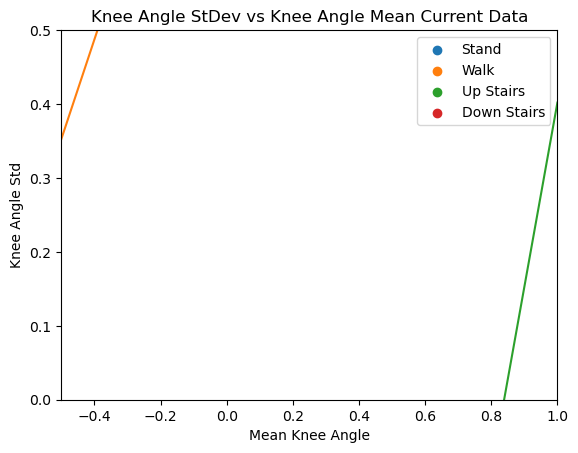

In [21]:
# determine B and B0
Bmc = logreg.coef_
B0mc = logreg.intercept_

# scatter plot of mean vs std for all points (within range)
plt.scatter(knee_scaled[G==1][:,0],knee_scaled[G==1][:,1])
plt.scatter(knee_scaled[G==2][:,0],knee_scaled[G==2][:,1])
plt.scatter(knee_scaled[G==3][:,0],knee_scaled[G==3][:,1])
plt.scatter(knee_scaled[G==4][:,0],knee_scaled[G==4][:,1])

# label plot
plt.xlabel("Mean Knee Angle")
plt.ylabel("Knee Angle Std")
plt.legend(('Stand','Walk','Up Stairs', 'Down Stairs'))
plt.title('Knee Angle StDev vs Knee Angle Mean Current Data')


# boundaries of plots
plt.xlim(-0.5, 1)
plt.ylim(0, 0.5)
xll , xul = plt.xlim()
yll , yul = plt.ylim()

# decision boundaries
for i in range(Bmc.shape[0]):
    plt.plot([xll, xul],[(-B0mc[i]-Bmc[i,0]*xll)/Bmc[i,1],(-B0mc[i]-Bmc[i,0]*xul)/Bmc[i,1]])
plt.ylim([yll,yul])


Text(0.5, 1.0, 'Knee Angle StDev vs Knee Angle Mean within Range of Random Points')

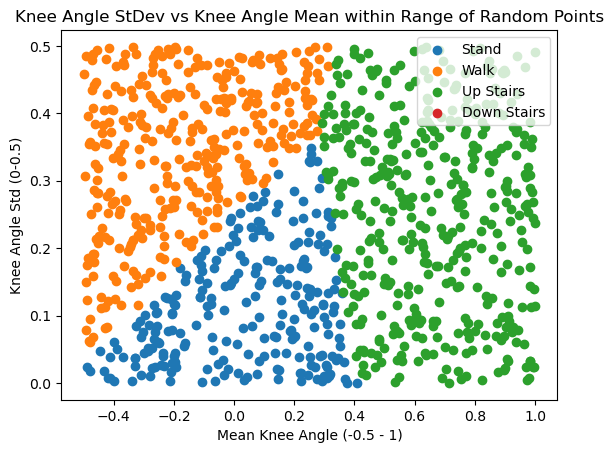

In [22]:
# create points within given range
std_tests = np.random.rand(1000) * 0.5
mean_tests = np.random.rand(1000) * 1.5 - 0.5
test_data = np.concatenate((mean_tests.reshape(1000,-1), std_tests.reshape(1000,-1)), axis=1)


# predict
knee_classmc = logreg.predict(test_data)

# plot of random points within range
plt.scatter(test_data[knee_classmc==1][:,0],test_data[knee_classmc==1][:,1])
plt.scatter(test_data[knee_classmc==2][:,0],test_data[knee_classmc==2][:,1])
plt.scatter(test_data[knee_classmc==3][:,0],test_data[knee_classmc==3][:,1])
plt.scatter(test_data[knee_classmc==4][:,0],test_data[knee_classmc==4][:,1])

# label plot
plt.xlabel("Mean Knee Angle (-0.5 - 1)")
plt.ylabel("Knee Angle Std (0-0.5)")
plt.legend(('Stand','Walk','Up Stairs', 'Down Stairs'))
plt.title('Knee Angle StDev vs Knee Angle Mean within Range of Random Points')

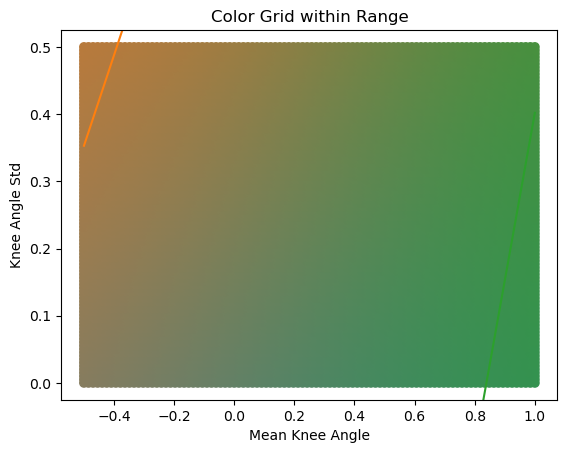

In [24]:

# define grid
std_lin = np.linspace(0, 0.5, 100)
mean_lin = np.linspace(-0.5, 1, 100)
mean_mesh, std_mesh = np.meshgrid(mean_lin, std_lin)
Xgrid = np.concatenate([mean_mesh.reshape(-1,1),std_mesh.reshape(-1,1)],axis=1)

# color map
colormap = np.array([[31, 119, 180], [255, 127, 14], [44, 160, 44], [214, 39, 40]])

# prediction grids
knee_classgrid = logreg.predict(Xgrid)
knee_probgrid = logreg.predict_proba(Xgrid)

# map probabilities into colors
colorGrid = knee_probgrid @ colormap/255

# plot
plt.scatter(Xgrid[:,0],Xgrid[:,1],c=colorGrid)
plt.xlabel("Mean Knee Angle")
plt.ylabel("Knee Angle Std")
plt.title("Color Grid within Range")

# plot dimensions
ll , ul = plt.xlim()
yll , yul = plt.ylim()

# plot decision boundaries
for i in range(Bmc.shape[0]):
    plt.plot([xll, xul],[(-B0mc[i]-Bmc[i,0]*xll)/Bmc[i,1],(-B0mc[i]-Bmc[i,0]*xul)/Bmc[i,1]])
    plt.ylim([yll,yul])